# Вейвлет-анализ

In [169]:
import numpy as np
import scipy.linalg as la
import scipy.interpolate as interp
import scipy.integrate as integrate
import scipy.fftpack as fft
import scipy.signal as signal
import matplotlib.pyplot as plt

## 1. Оконное преобразование Фурье

### Исходные данные

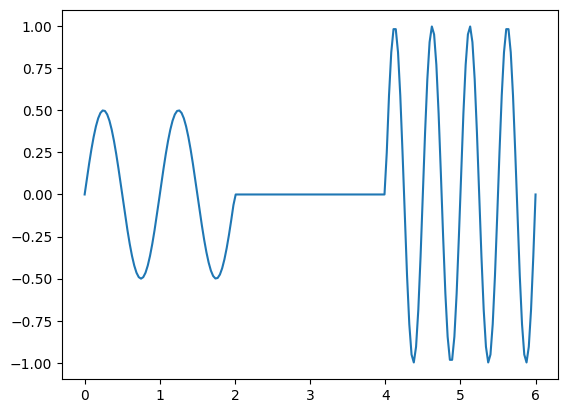

In [170]:
x = np.linspace(0, np.pi * 6, 201)

n = len(x)

L = max(x) - min(x)

y = 0. + 0.5*np.sin(x * 2) 

y[x>np.pi * 2] = 0.

y[x>np.pi * 4] = 1. *np.sin(x [x>np.pi * 4]* 4)

#print (x/(np.pi))

plt.plot(x/np.pi, y)

### Подвижное окно

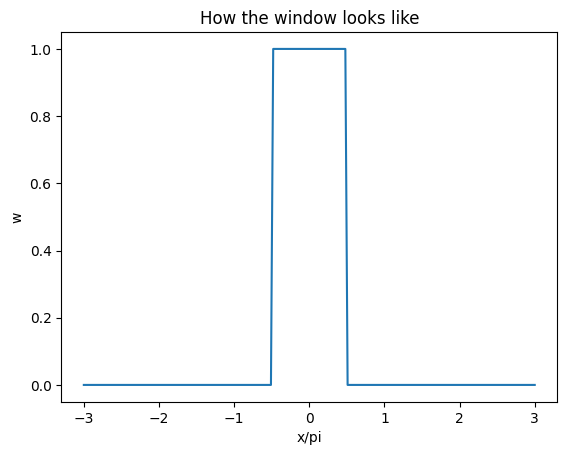

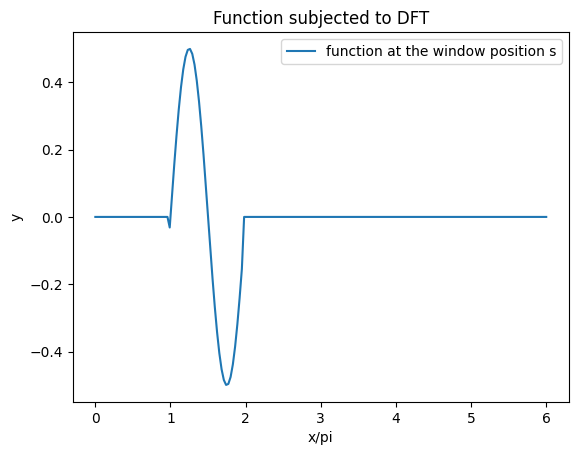

In [171]:
B = np.zeros ((len(x)))

dx = L / (n-1)

xw = np.linspace(-L, L, 2*len(x)-1)

Win = np.zeros ((2*len(x)-1))

WinSize = np.pi/2 # window width

Win[abs(xw)<WinSize] = 1.

plt.figure()
plt.title ('How the window looks like')
plt.xlabel('x/pi')
plt.ylabel('w')
plt.plot (xw [abs(xw)<=3*np.pi] /np.pi , Win [abs(xw)<=3*np.pi])

s = 50 # window position

for i in range (0,n-1):
             
    B[i] = y[i] * Win[i-s+n]                        
       
plt.figure ()
plt.title ('Function subjected to DFT')
plt.xlabel('x/pi')
plt.ylabel('y')
plt.plot (x/np.pi, B, label='function at the window position s')
plt.legend()


### Оконное преобразование Фурье

[[0.31423559 0.31229479 0.30652368 ... 0.11006497 0.08728135 0.06594631]
 [0.31799558 0.31594542 0.30985262 ... 0.10641935 0.0835215  0.06228389]
 [0.31611187 0.31413125 0.30824192 ... 0.10828853 0.08525998 0.06376553]
 ...
 [0.0801361  0.09489281 0.1307934  ... 0.55382527 0.54359955 0.5185554 ]
 [0.0339053  0.07891343 0.14538232 ... 0.51586238 0.49935151 0.4723287 ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
(201,) (201,) (15, 201)


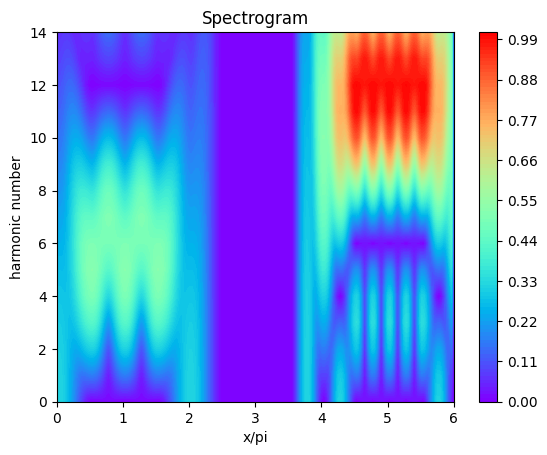

In [172]:
nf = 15 # number of harmonics taking into account

a2 = np.zeros((n,nf))
b2 = np.zeros((n,nf))
A2 = np.zeros((n,nf))

Freq = np.zeros ((len(x)))
Shift = np.zeros ((len(x)))

CosTerm = np.zeros ((len(x)))
SinTerm = np.zeros ((len(x)))

for k in range (0,nf):
    
    Freq [k] = k

    for s in range (0,n-1):
        
        Shift[s] = s
    
        a2[s,k]=0.
        b2[s,k]=0.
       
        for i in range (0,n-1):
    
            a2[s,k] +=  2./ WinSize /2 * y[i] * Win[i-s+n] * np.cos(2*np.pi*x[i]/L * k) * dx 
            b2[s,k] +=  2./ WinSize /2 * y[i] * Win[i-s+n] * np.sin(2*np.pi*x[i]/L * k) * dx
        
                                   
A2 = (a2**2+b2**2)**0.5 
print(A2)

print (x.shape, Freq.shape, A2.T.shape)

plt.figure()
plt.title ('Spectrogram')
plt. xlabel ('x/pi')
plt. ylabel ('harmonic number')
plt.contourf(x/np.pi, Freq[0:nf], A2.T, 100, cmap='rainbow')
plt.colorbar()

## 2. Дискретное вейвлет-преобразование

In [173]:
def BasicFunctionsWavelet (nj, x):
    
    # formation of wavelet basis    
    # nj - number of scale levels
    
    n = len(x) 
    
    x_left = x[0]; x_right = x[n-1]
    
    nf = 0
    
    for j in range (0, nj):
        nk = 2**j
        nf = nf + nk
    
       
    L = x_right - x_left

    PhiFunArray = np.zeros((n, nf+1))
    
    #print (PhiFunArray.shape)
                   
    PhiFunArray[:,nf] = 1.
    
    jk = -1
    
    for j in range (0, nj):
        nk = 2**j
        for k in range (0, nk):
            jk = jk+1
            for i in range(0,n):
                PhiFunArray[i,jk] = BFW (x[i], j, k, x_left, x_right)            
    return PhiFunArray

def BFW (xi, j, k, x_left, x_right):
    # dilation (j) and translation (k) of wavelet functions
    L = x_right - x_left
    Phijk=2.**(j/2)*WaveletHaar (2**j*(xi-x_left)/L-k)
    return Phijk
    
def WaveletHaar(x):
    x_left = 0.; L=1
    W = 0.
    if (x>=x_left and x<x_left+L/2):
        W = 1.
    if (x>=x_left+L/2 and x<=x_left+L):
        W = -1
    return W

def WaveletMexh(x):
    # just for example, not for applying to DWT
    xm = 0.5
    y = (x-xm) * 1. #(x_right-x_left)/2
    W = np.exp(-0.5*y**2)-y**2*np.exp(-0.5*y**2)
    return W

### Базисные функции

(1001, 32)
(1001, 5, 16)


<Figure size 640x480 with 0 Axes>

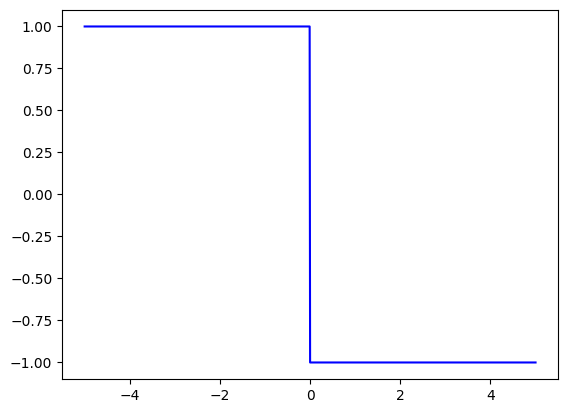

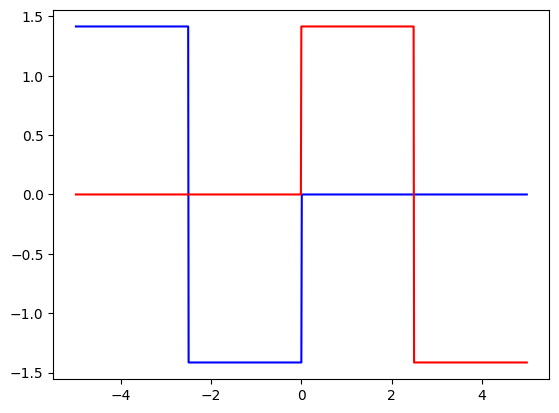

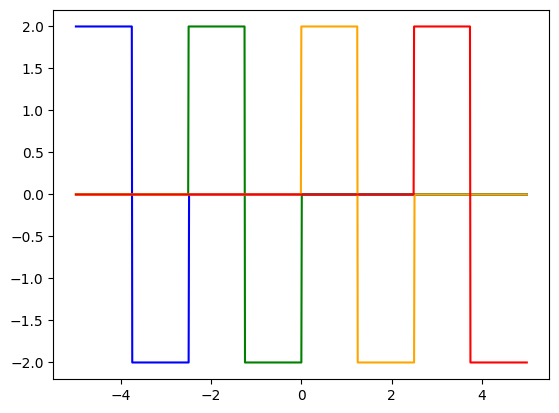

<Figure size 640x480 with 0 Axes>

In [174]:
x_left = -5. #-5
x_right = 5. #5

L = x_right - x_left

x = np.linspace(x_left, x_right, 1001)
n = len(x)

nj = 5
nk = 2**(nj-1)

Phi = np.zeros((n, nj, nk))

for j in range (0, nj):
    nk =  2**j #int (2**j-1)+1
    for k in range (0, nk):
        for i in range(0,n):
            Phi[i,j,k] = BFW (x[i], j, k, x_left, x_right)

BF = BasicFunctionsWavelet (nj, x)

print (BF.shape)
print (Phi.shape)

plt.plot (x, BF[:,0], 'b')

plt.figure ()

plt.plot (x, BF[:,1], 'b')
plt.plot (x, BF[:,2],'r')

plt.figure ()          
plt.plot (x, BF[:,3], 'b')
plt.plot (x, BF[:,4],'g')
plt.plot (x, BF[:,5],'orange')
plt.plot (x, BF[:,6],'r')

plt.figure()

#plt.plot (x, BF[:,3])

### Прямое и обратное вейвлет - преобразование. Кратномасштабный анализ.

(128,) (8,) (128, 8)
[[-5.38889097e-03  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-4.15916850e-03 -3.46187419e-03  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-1.88960648e-03 -2.52555393e-19  1.60861331e-16 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [-5.66156810e-03 -1.66246051e-04 -5.66156810e-03 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-6.94608884e-02  6.15902033e-02  6.15902033e-02 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-4.05530553e-02 -1.15093735e-02  1.27824668e-02 ... -2.29951669e-02
  -3.41206654e-02 -5.43015147e-02]]


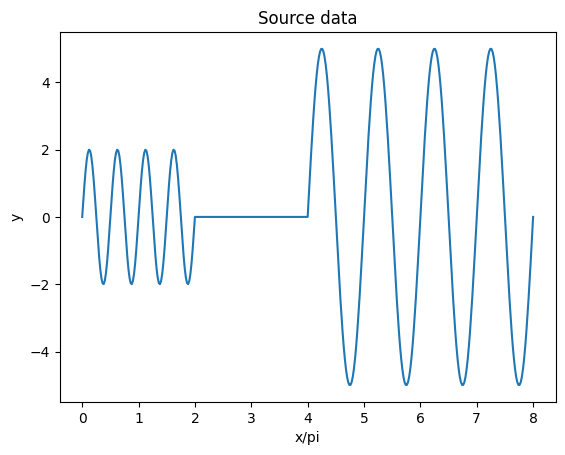

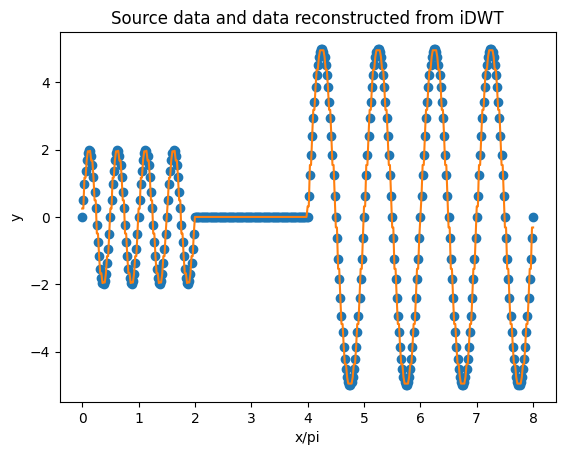

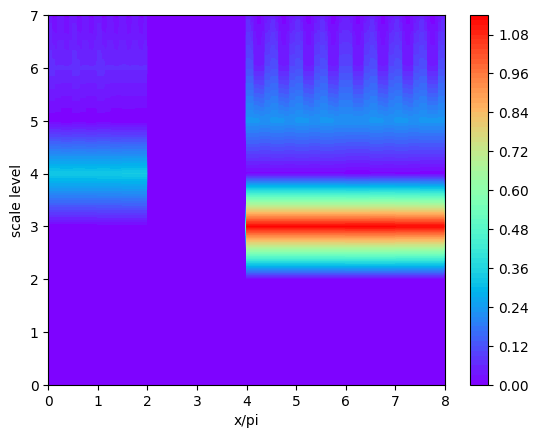

In [175]:
x_left = 0; x_right = np.pi * 8

x = np.linspace(0, np.pi * 8, 401)
#x = np.linspace(-2, 2, 101)

n = len(x)

L = max(x) - min(x)

y = 0. + 2*np.sin(x * 4) #+ 2.*np.sin(x * 4 ) #+ np.sin(x * 25.5)

y[x>np.pi * 2] = 0.

y[x>np.pi * 4] = 5. *np.sin(x [x>np.pi * 4]* 2)

plt.title ('Source data') 
plt.xlabel ('x/pi')
plt.ylabel ('y')
plt.plot(x/np.pi, y)

plt.figure ()

nj = 8 # number of scale levels

# direct transformation

Phi = BasicFunctionsWavelet (nj, x)
   
PhiT = Phi.T
G = PhiT @ Phi 
z = PhiT @ y
a = np.linalg.solve(G, z)

# inverse transformation
   
w = Phi@a

# scaleogramm

jk = -1

Nk = 2**(nj-1)

Cw = np.zeros((nj, Nk))

Cf = np.zeros((n, nj))

Lscale = np.zeros(nj)
Ltrans = np.zeros(Nk)

for k in range (0, Nk):
    Ltrans[k] = k

for j in range (0, nj):
    Lscale[j] = j
    nk = 2**j
    
    for k in range (0, nk):
        jk = jk+1
        Cw[j,k] = a[jk]
        for i in range (0,n):
            if (x[i]>=x_left+k*L/2**j and x[i]<x_left+(k+1)*L/2**j):
                Cf[i,j] = a[jk]
                
plt.title ('Source data and data reconstructed from iDWT') 
plt.xlabel ('x/pi')
plt.ylabel ('y')
plt.plot (x/np.pi,y, 'o')
plt.plot (x/np.pi,w)

print (Ltrans.shape, Lscale.shape, Cw.T.shape)
print (Cw)


plt.figure()
plt.xlabel ('x/pi')
plt.ylabel ('scale level')
plt.contourf(x/np.pi, Lscale, abs(Cf.T), 100, cmap='rainbow')
plt.colorbar()

### Дискретные и непрерывные вейвлеты pywt

['bior1.1', 'bior1.3', 'bior1.5', 'bior2.2', 'bior2.4', 'bior2.6', 'bior2.8', 'bior3.1', 'bior3.3', 'bior3.5', 'bior3.7', 'bior3.9', 'bior4.4', 'bior5.5', 'bior6.8', 'cgau1', 'cgau2', 'cgau3', 'cgau4', 'cgau5', 'cgau6', 'cgau7', 'cgau8', 'cmor', 'coif1', 'coif2', 'coif3', 'coif4', 'coif5', 'coif6', 'coif7', 'coif8', 'coif9', 'coif10', 'coif11', 'coif12', 'coif13', 'coif14', 'coif15', 'coif16', 'coif17', 'db1', 'db2', 'db3', 'db4', 'db5', 'db6', 'db7', 'db8', 'db9', 'db10', 'db11', 'db12', 'db13', 'db14', 'db15', 'db16', 'db17', 'db18', 'db19', 'db20', 'db21', 'db22', 'db23', 'db24', 'db25', 'db26', 'db27', 'db28', 'db29', 'db30', 'db31', 'db32', 'db33', 'db34', 'db35', 'db36', 'db37', 'db38', 'dmey', 'fbsp', 'gaus1', 'gaus2', 'gaus3', 'gaus4', 'gaus5', 'gaus6', 'gaus7', 'gaus8', 'haar', 'mexh', 'morl', 'rbio1.1', 'rbio1.3', 'rbio1.5', 'rbio2.2', 'rbio2.4', 'rbio2.6', 'rbio2.8', 'rbio3.1', 'rbio3.3', 'rbio3.5', 'rbio3.7', 'rbio3.9', 'rbio4.4', 'rbio5.5', 'rbio6.8', 'shan', 'sym2', 'sym3

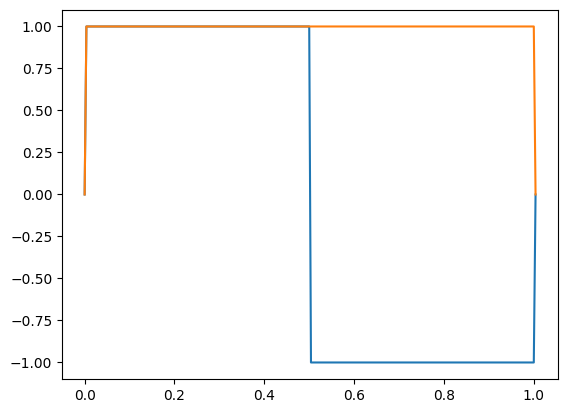

In [176]:
import pywt
print(pywt.wavelist())
#w = pywt.ContinuousWavelet('mexh')
w = pywt.Wavelet('db1')
print(w.orthogonal)
(phi, psi, x) = w.wavefun()
#(psi, x) = w.wavefun()
plt.plot (x, psi)
plt.plot (x, phi)
#print (psi@phi)

### Дискретное вейвлет-преобразование pywt

In [177]:
from pywt import wavedec
coeffs = wavedec([1,2,3,4,5,6,7,8], 'db1', level=3) # db1 - Haar wavelet

cA2, cD2, cD1, cD0 = coeffs

print (cA2)
print (cD2)
print (cD1)
print (cD0)

[12.72792206]
[-5.65685425]
[-2. -2.]
[-0.70710678 -0.70710678 -0.70710678 -0.70710678]


### Дискретное вейвлет-преобразование своими силами

4.5
-2.0
-0.7071067811865475 -0.7071067811865475
[-0.25 -0.25 -0.25 -0.25]
note that ratio of coefficients is the same as in pywt


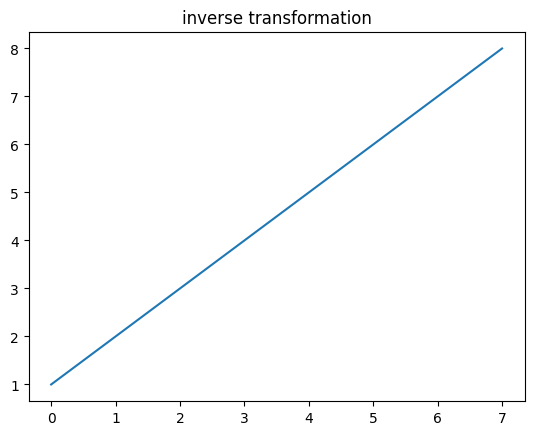

In [178]:
nj = 3

#x = [1,2,3,4,5,6,7,8]
x = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]

y = [1,2,3,4,5,6,7,8]

Phi = BasicFunctionsWavelet (nj, x)
   
PhiT = Phi.T
G = PhiT @ Phi 
z = PhiT @ y
a = np.linalg.solve(G, z)

print (a[-1])
print (a[0])
print (a[1], a[2])
print (a[3:7])
print ('note that ratio of coefficients is the same as in pywt')

w = Phi@a

plt.title ('inverse transformation')
plt.plot (w)

# Домашняя работа

In [179]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

## Построение спектограммы

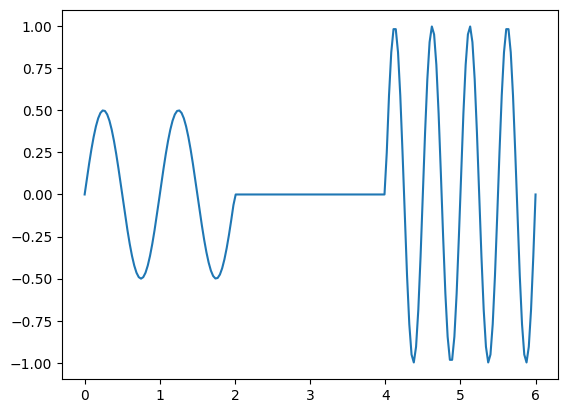

In [180]:
# Создание сигнала
x = np.linspace(0, np.pi * 6, 201)  # x от 0 до 6π
y = 0.5 * np.sin(x * 2)             # Синусоида частоты 2
y[x > np.pi * 2] = 0.               # Обнуление для x > 2π
y[x > np.pi * 4] = 1. * np.sin(x[x > np.pi * 4] * 4)  # Высокочастотная синусоида для x > 4π


plt.plot(x/np.pi, y)

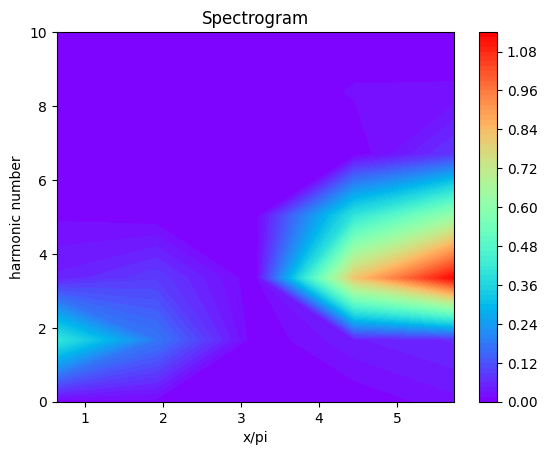

In [181]:
# Расчет спектрограммы
fs = len(x) / (x[-1] - x[0])  # "Частота дискретизации"
frequencies, times, Sxx = spectrogram(y, fs, nperseg=40, noverlap=0, scaling='density')
# nperseg: Длина каждого сегмента (в отсчётах) для вычисления спектра (40 отсчётов).
# noverlap: Число отсчётов, перекрывающихся между соседними сегментами (20 отсчётов).

# frequencies: Одномерный массив частот (в Гц). 
# times: Одномерный массив временных меток (в секундах), соответствующих центрам сегментов.
# Sxx: Двумерный массив мощности для каждой комбинации частота-время

# Визуализация
plt.figure()
plt.title('Spectrogram')
plt.xlabel('x/pi')
plt.ylabel('harmonic number')
plt.contourf(times / (np.pi / fs)/10, frequencies * np.pi * 2, Sxx, 100, cmap='rainbow')
plt.colorbar()
plt.ylim(0, 10)
plt.show()


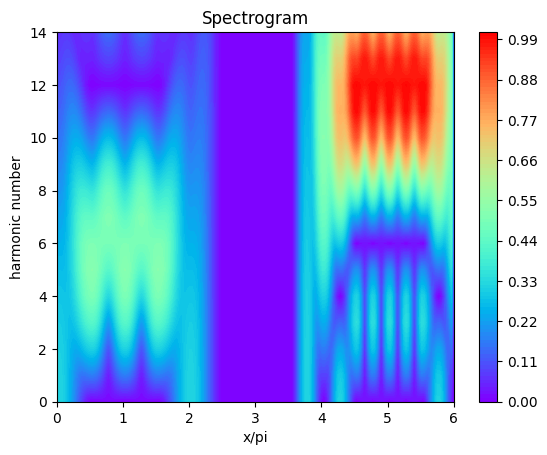

In [182]:
plt.figure()
plt.title ('Spectrogram')
plt. xlabel ('x/pi')
plt. ylabel ('harmonic number')
plt.contourf(x/np.pi, Freq[0:nf], A2.T, 100, cmap='rainbow')
plt.colorbar()

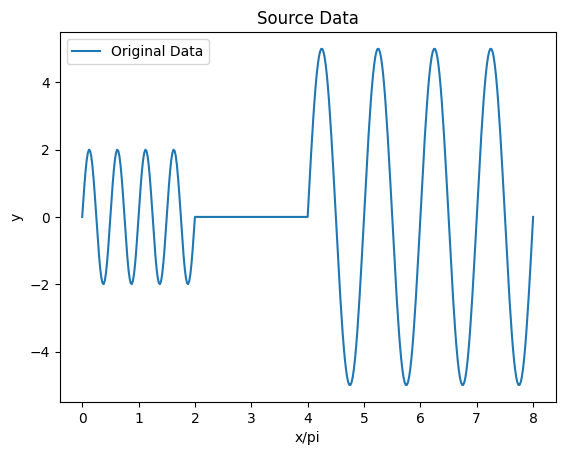

(401,) (401,)


/home/varvara/miniconda3/envs/data_analysis/lib/python3.12/site-packages/pywt/_multilevel.py:43: UserWarning: Level value of 8 is too high: all coefficients will experience boundary effects.
  warnings.warn(


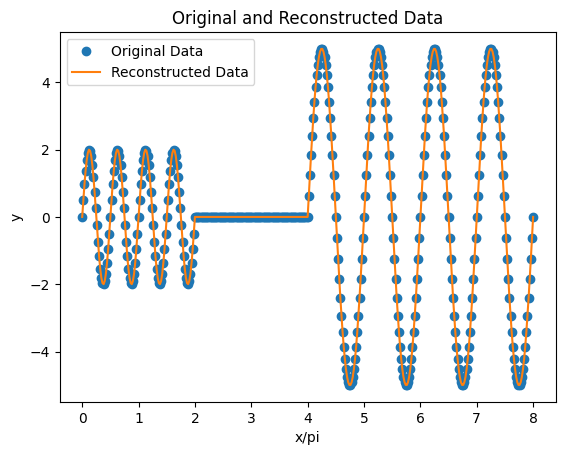

TypeError: Input z must be 2D, not 1D

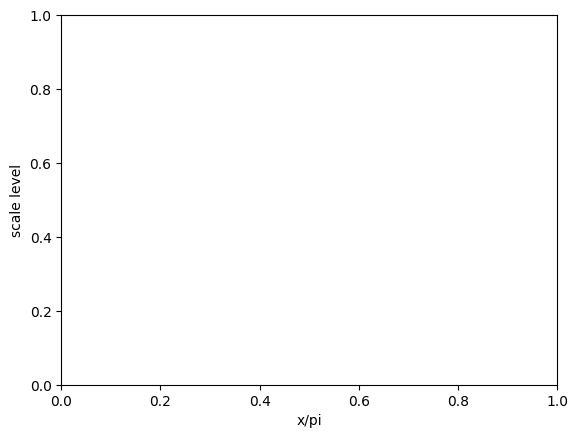

In [183]:
import numpy as np
import matplotlib.pyplot as plt
import pywt

# Параметры данных
x = np.linspace(0, np.pi * 8, 401)
y = 0. + 2 * np.sin(x * 4)
y[x > np.pi * 2] = 0
y[x > np.pi * 4] = 5. * np.sin(x[x > np.pi * 4] * 2)

# Отображение исходных данных
plt.figure()
plt.title('Source Data')
plt.xlabel('x/pi')
plt.ylabel('y')
plt.plot(x / np.pi, y, label='Original Data')
plt.legend()
plt.show()

# Прямое вейвлет-преобразование
wavelet = 'db4'  # Выбор вейвлета (например, Daubechies с 4 элементами)
coeffs = pywt.wavedec(y, wavelet, level=8)

# Реконструкция данных (обратное преобразование)
y_reconstructed = pywt.waverec(coeffs, wavelet)
y_reconstructed = y_reconstructed[:len(y_reconstructed)-1]
print(x.shape,  y_reconstructed.shape)
# Сравнение исходных данных с реконструированными
plt.figure()
plt.title('Original and Reconstructed Data')
plt.xlabel('x/pi')
plt.ylabel('y')
plt.plot(x / np.pi, y, 'o', label='Original Data')
plt.plot(x / np.pi, y_reconstructed, label='Reconstructed Data')
plt.legend()
plt.show()


# # Построение масштаброграммы
# plt.figure()
# plt.title('Scaleogram')
# plt.xlabel('x/pi')
# plt.ylabel('Scale Level')
# coeffs_array, coeff_slices = pywt.coeffs_to_array(coeffs)  # Преобразование коэффициентов в массив
# plt.imshow(np.abs(coeffs_array), aspect='auto', cmap='rainbow', extent=[min(x / np.pi), max(x / np.pi), 8, 0])
# plt.colorbar(label='Coefficient Magnitude')
# plt.show()


# plt.title ('Source data and data reconstructed from iDWT') 
# plt.xlabel ('x/pi')
# plt.ylabel ('y')
# plt.plot (x/np.pi,y, 'o')
# plt.plot (x/np.pi,w)

# #print (Ltrans.shape, Lscale.shape, Cw.T.shape)
# #print (Cw)


plt.figure()
plt.xlabel ('x/pi')
plt.ylabel ('scale level')
plt.contourf(x/np.pi, y_reconstructed, np.abs(coeffs_array), 100, cmap='rainbow')
plt.colorbar()


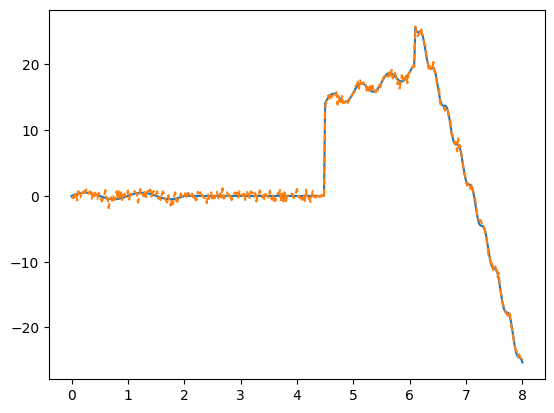

In [37]:
x = np.linspace(0, np.pi * 8, 401) 
y = 0.5 * np.sin(x * 2)            
y[x > np.pi * 2] = 0.               
y[x > np.pi * 4.5] = 1. * np.sin(x[x > np.pi * 4.5] * 4) + x[x > np.pi * 4.5]  
y[x > np.pi * 6.1] = 1. * np.cos(x[x > np.pi * 6.1] * 9) - 0.2 * x[x > np.pi * 6.1] * x[x > np.pi * 6.1] + 100

# Добавляем шум
noise = np.random.normal(0, 0.5, size=y.shape)  # шум с нормальным распределением
y_gen = y + noise


plt.plot(x/np.pi, y, label="Оригиналбный сигнал")
plt.plot(x/np.pi, y_gen, '--', label="Зашумленный сигнал")



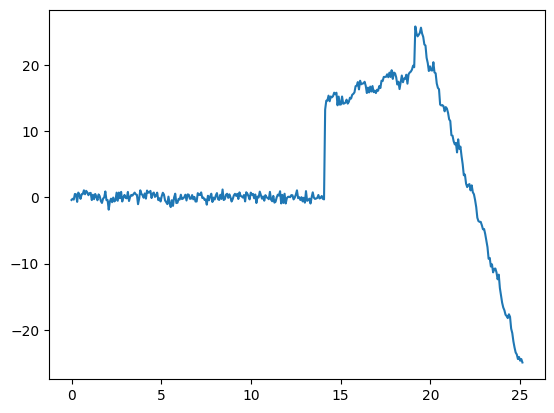

In [38]:
import pandas as pd
data = pd.DataFrame({'x': x, 'y': y_gen})
data.to_csv('signal.csv', index=False)


data = pd.read_csv('signal.csv')
x = data['x']
y = data['y']

plt.plot(x, y, label="Cигнал")

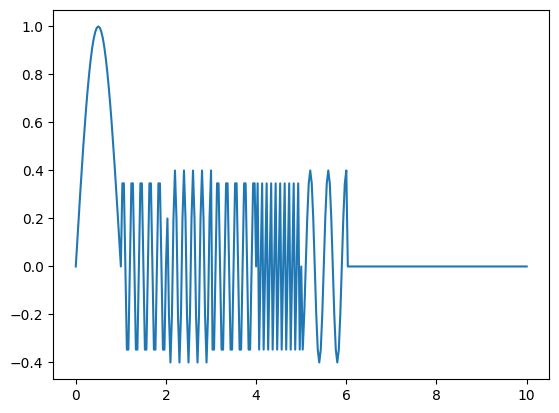

In [47]:
data = pd.read_csv('data.csv')
x = data['x']
y = data['y']

x = np.array(x)
y = np.array(y)

plt.plot(x/np.pi, y, label="Cигнал")

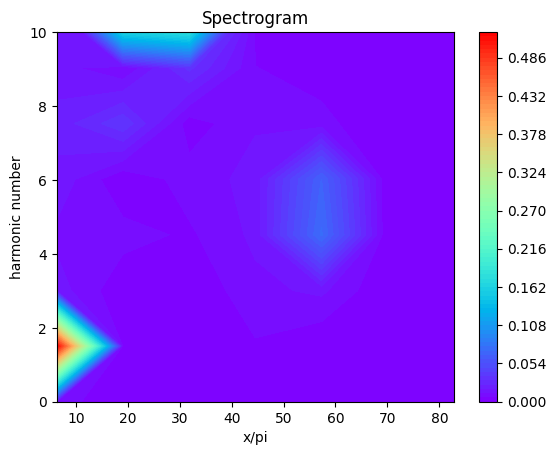

In [40]:
fs = len(x) / (x[-1] - x[0])  # "Частота дискретизации"
frequencies, times, Sxx = spectrogram(y, fs, nperseg=40, noverlap=0, scaling='density')
# nperseg: Длина каждого сегмента (в отсчётах) для вычисления спектра (40 отсчётов).
# noverlap: Число отсчётов, перекрывающихся между соседними сегментами (20 отсчётов).

# frequencies: Одномерный массив частот (в Гц). 
# times: Одномерный массив временных меток (в секундах), соответствующих центрам сегментов.
# Sxx: Двумерный массив мощности для каждой комбинации частота-время

# Визуализация
plt.figure()
plt.title('Spectrogram')
plt.xlabel('x/pi')
plt.ylabel('harmonic number')
plt.contourf(times / (np.pi / fs), frequencies * np.pi * 2, Sxx, 100, cmap='rainbow')
plt.colorbar()
plt.ylim(0, 10)
plt.show()


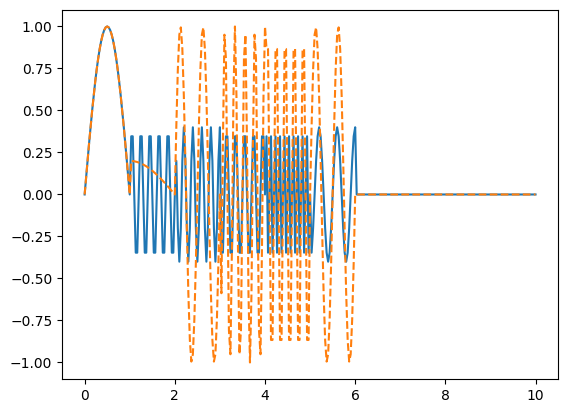

In [54]:
y_gen = 1.0 * np.sin(x)            
y_gen[x > np.pi] =   0.2 * np.sin(x[x > np.pi] * 0.5)                 
y_gen[x > np.pi * 2] = 1. * np.sin(x[x > np.pi * 2] * 4) 
y_gen[x > np.pi * 3] = 1. * np.cos(x[x > np.pi * 3] * 9)
y_gen[x > np.pi * 4] = 1. * np.sin(x[x > np.pi * 4] * 10)                 
y_gen[x > np.pi * 5] = 1. * np.sin(x[x > np.pi * 5] * 4) 
y_gen[x > np.pi * 6] = 0


plt.plot(x/np.pi, y, label="Оригиналбный сигнал")
plt.plot(x/np.pi, y_gen, '--', label="Востановленный сигнал")

# дз

## 1. Оконное преобразование Фурье

In [222]:
import numpy as np
import matplotlib.pyplot as plt

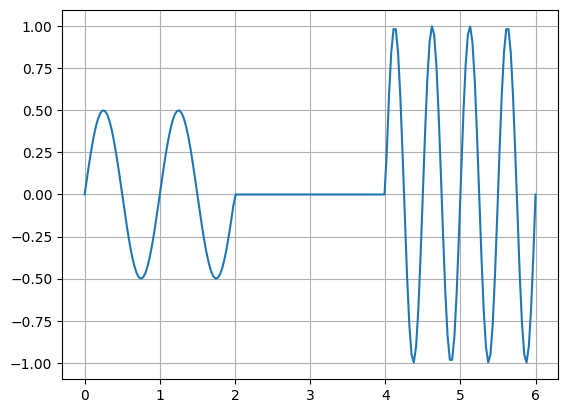

In [223]:
# Создаем временную шкалу и сигнал
x = np.linspace(0, np.pi * 6, 201)
y = 0.5 * np.sin(2 * x)
y[x > np.pi * 2] = 0.0
y[x > np.pi * 4] = np.sin(4 * x[x > np.pi * 4])

plt.figure()
plt.plot(x/np.pi, y)
plt.grid()
plt.show()

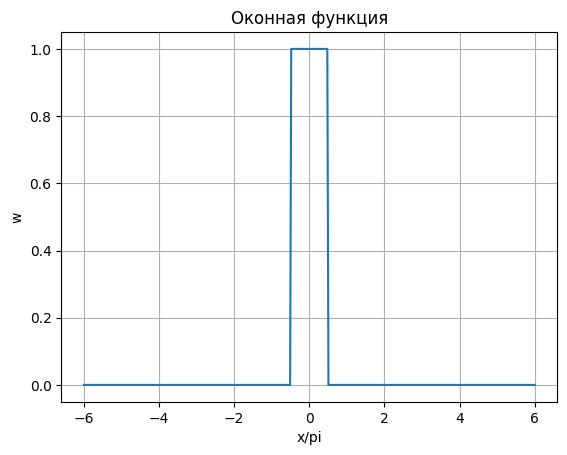

In [224]:
# Параметры окна
WinSize = np.pi / 2  # Ширина окна
n = len(x)           # Количество точек временного сигнала
L = max(x) - min(x)  # Длина временного сигнала
dx = L / (n - 1)     # Шаг дискретизации временной шкалы (разница между соседними x)
xw = np.linspace(-L, L, 2 * len(x) - 1)  # Пространство для оконной функции, удвоенной длины сигнала
window = np.zeros_like(xw)               # Инициализация массива для окна
window[np.abs(xw) < WinSize] = 1.0       # Заполнение окна единицами в пределах заданной ширины WinSize


# Визуализация окна
plt.figure()
plt.title('Оконная функция')
plt.xlabel('x/pi')
plt.ylabel('w')
plt.plot(xw / np.pi, window)
plt.grid()
plt.show()

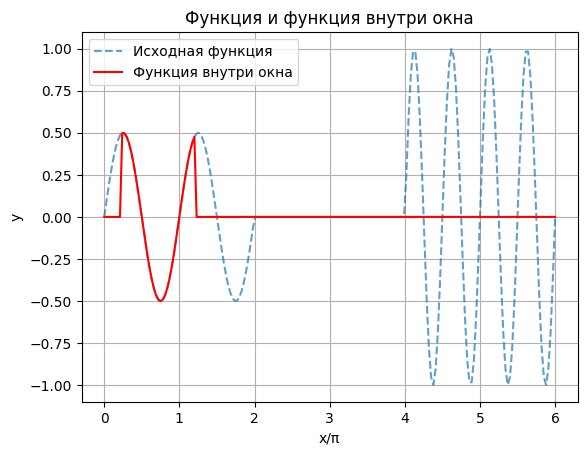

In [225]:
s = 25  # Положение окна (сдвиг по временной шкале)

# Применение окна к сигналу
B = np.zeros_like(y)  # Инициализация массива для окна
for i in range(n):
    if 0 <= i - s + n < len(window):  # Проверка, что индексы находятся в пределах границ
        B[i] = y[i] * window[i - s + n]


plt.figure()
plt.title('Функция и функция внутри окна')
plt.xlabel('x/π')
plt.ylabel('y')
plt.plot(x / np.pi, y, label='Исходная функция', linestyle='--', alpha=0.7)
plt.plot(x / np.pi, B, label='Функция внутри окна', color='red')
plt.legend()
plt.grid()
plt.show()



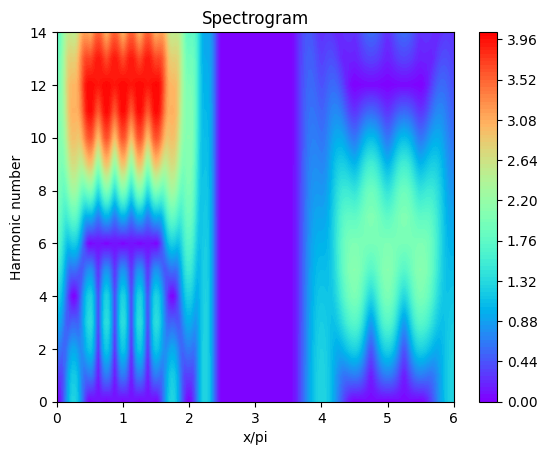

In [226]:
# Параметры спектра
nf = 15
a2 = np.zeros((n, nf))
b2 = np.zeros((n, nf))
A2 = np.zeros((n, nf))
Freq = np.arange(nf)  # частоты гармоник

# Вычисление коэффициентов для гармоник
k_vals = 2 * np.pi * Freq / L

# Вычисление a2 и b2 с векторизацией
for s in range(n):
    for k in range(nf):
        # Вычисляем компоненты для a2 и b2
        a2[s, k] = np.sum(2. / (WinSize / 2) * y * window[s:n + s] * np.cos(k_vals[k] * x) * dx)
        b2[s, k] = np.sum(2. / (WinSize / 2) * y * window[s:n + s] * np.sin(k_vals[k] * x) * dx)

# Вычисление спектра A2
A2 = np.sqrt(a2**2 + b2**2)

# Построение спектрограммы
plt.figure()
plt.title('Spectrogram')
plt.xlabel('x/pi')
plt.ylabel('Harmonic number')
plt.contourf(x / np.pi, Freq[:nf], A2.T, 100, cmap='rainbow')
plt.colorbar()
plt.show()



## 2. Вейвлет-преобразование

## Генерация данных

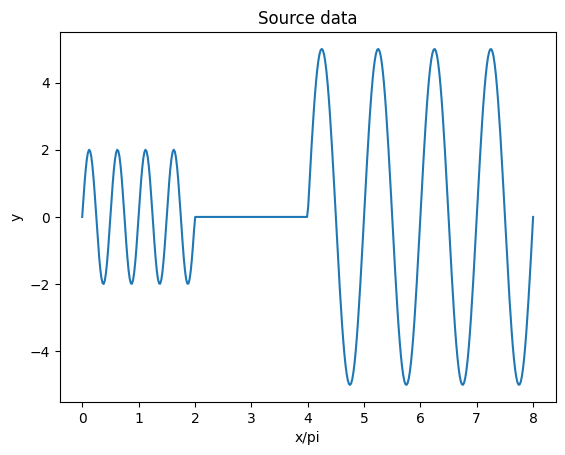

In [227]:
x = np.linspace(0, np.pi * 8, 400)
n = len(x)
y = 2 * np.sin(x * 4)

y[x > np.pi * 2] = 0.
y[x > np.pi * 4] = 5. * np.sin(x[x > np.pi * 4] * 2)

plt.title('Source data')
plt.xlabel('x/pi')
plt.ylabel('y')
plt.plot(x / np.pi, y)
plt.show()

## Дискретный вейвлет haar

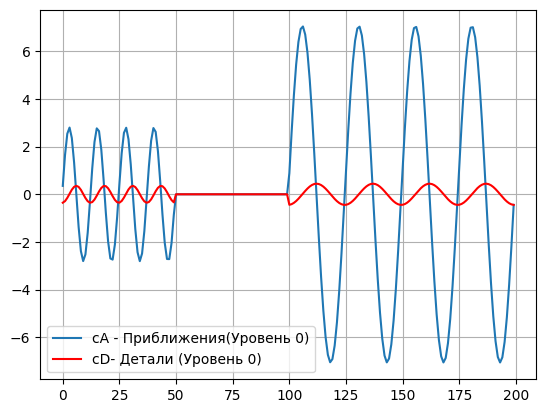

In [228]:
coeffs = pywt.dwt(y, 'haar')
cA, cD= coeffs
plt.plot(cA, label='cA - Приближения(Уровень 0)')
plt.plot(cD, color='red', label='cD- Детали (Уровень 0)')
plt.legend()
plt.grid(True)

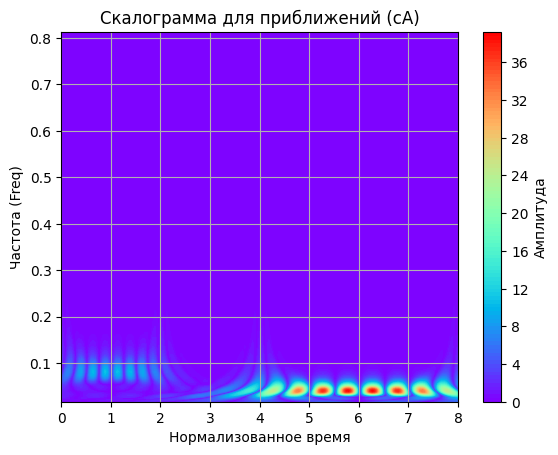

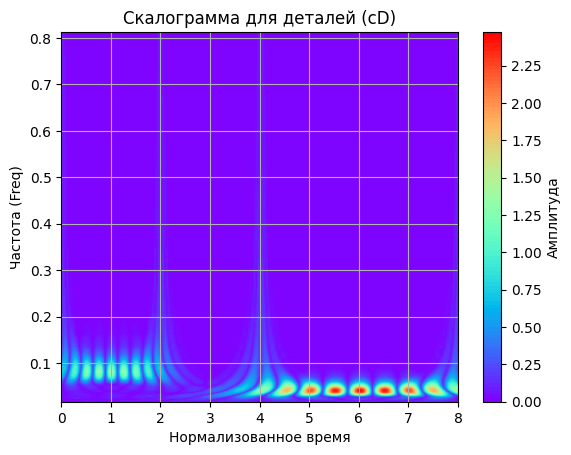

In [229]:
scales = np.arange(1, 50)
wavelet = 'morl'

# Скалограмма для приближений (cA)
coeff_A, freqs_A = pywt.cwt(cA, scales, wavelet)
plt.figure()
plt.title('Скалограмма для приближений (cA)')
plt.xlabel('Нормализованное время')
plt.ylabel('Частота (Freq)')
plt.contourf(np.linspace(min(x)/np.pi, max(x)/np.pi, len(cA)), freqs_A, np.abs(coeff_A), 100, cmap='rainbow')
plt.colorbar(label='Амплитуда')
plt.grid(True)
plt.show()

# Скалограмма для деталей (cD)
coeff_D, freqs_D = pywt.cwt(cD, scales, wavelet)
plt.figure()
plt.title('Скалограмма для деталей (cD)')
plt.xlabel('Нормализованное время')
plt.ylabel('Частота (Freq)')
plt.contourf(np.linspace(min(x)/np.pi, max(x)/np.pi, len(cD)), freqs_D, np.abs(coeff_D), 100, cmap='rainbow')
plt.colorbar(label='Амплитуда')
plt.grid(True)
plt.show()



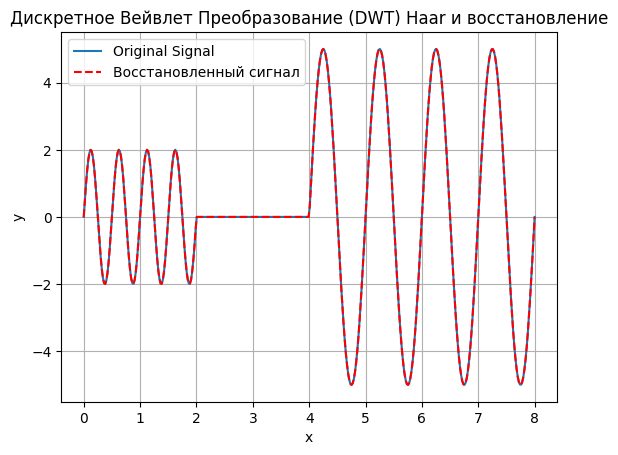

In [230]:
# Восстановление сигнала
reconstructed_signal = pywt.idwt(cA, cD, 'haar')
plt.plot(x / np.pi, y, label='Original Signal')
plt.plot(x / np.pi, reconstructed_signal, color='red',label='Восстановленный сигнал', linestyle='--')
plt.legend()
plt.title("Дискретное Вейвлет Преобразование (DWT) Haar и восстановление")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)

plt.show()

## Генерация данных

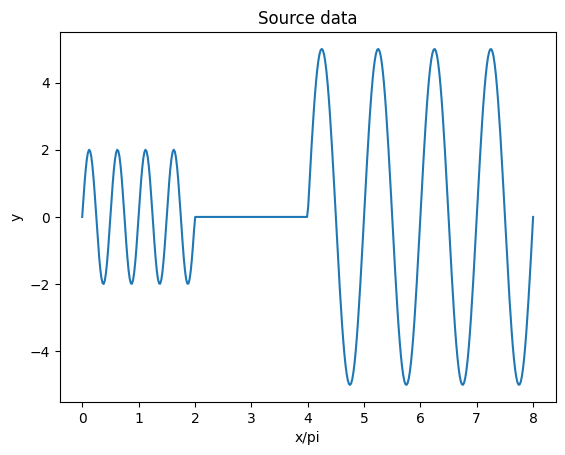

In [231]:
x = np.linspace(0, np.pi * 8, 400)
n = len(x)
y = 2 * np.sin(x * 4)

y[x > np.pi * 2] = 0.
y[x > np.pi * 4] = 5. * np.sin(x[x > np.pi * 4] * 2)

plt.title('Source data')
plt.xlabel('x/pi')
plt.ylabel('y')
plt.plot(x / np.pi, y)
plt.show()

## Дискретный вейвлет Daubechies-1 (db1)

[array([ 9.84684960e-01,  2.56519202e+00,  2.44821203e+00,  8.70586053e-01,
        1.22474487e-01, -2.44948974e-01,  1.22474487e-01, -2.63895843e-01,
       -7.91033905e-14,  2.12132034e-01, -2.12132034e-01,  1.41421356e-01,
       -1.22474487e-01, -1.22474487e-01,  2.44948974e-01,  1.22474487e-01,
       -1.22474487e-01,  1.52280966e-13, -1.22474487e-01,  4.57081009e-01,
       -3.34606521e-01, -1.22474487e-01,  2.63895843e-01,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00]), array([-5.45248396e-01, -2.09301249e-01,  2.65148652e-01,  4.04708527e-01,
       -3.67423461e-01, -5.82450754e-14,  3.67423461e-01,  1.89468691e-02,
        4.24264069e-01, -2.12132034e-01, -2.12132034e-01, -1.03527618e-01,
       -3.67423461e-01,  3.67423461e-01, -1.10467191e-14

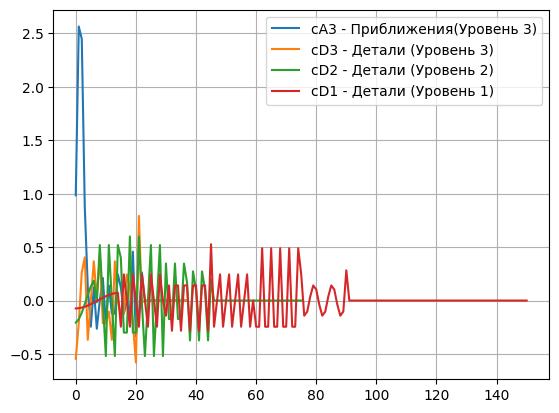

In [ ]:
coeffs = pywt.wavedec(y, 'db1', level=3)
cA3, cD3, cD2, cD1 = coeffs

plt.plot(cA3, label='cA3 - Приближения(Уровень 3)')
plt.legend()
plt.plot(cD3, label='cD3 - Детали (Уровень 3)')
plt.legend()
plt.plot(cD2, label='cD2 - Детали (Уровень 2)')
plt.legend()
plt.plot(cD1, label='cD1 - Детали (Уровень 1)')
plt.legend()
plt.grid(True)




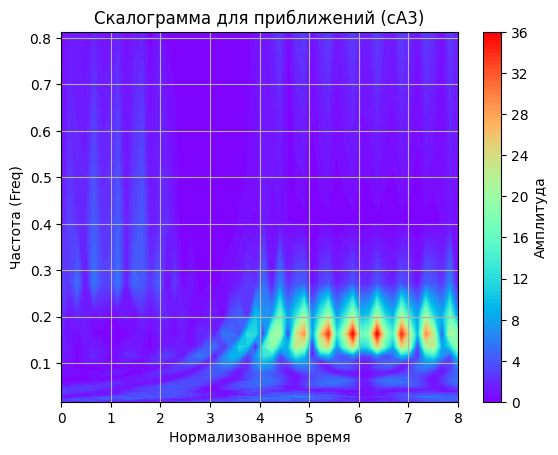

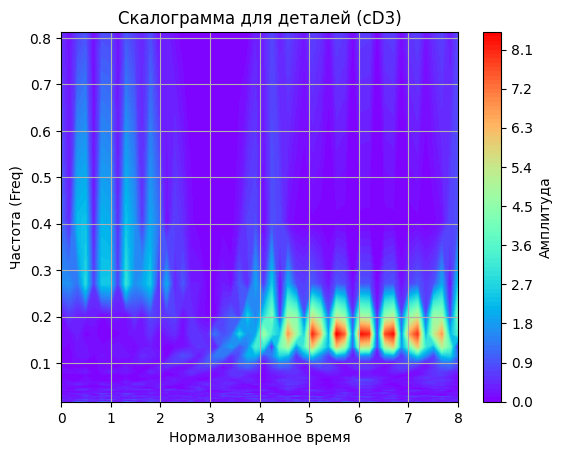

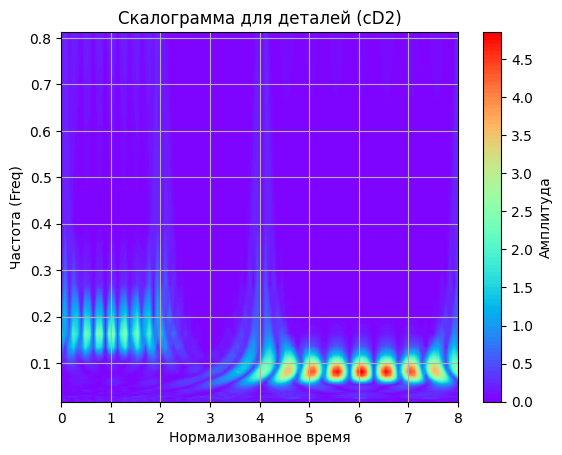

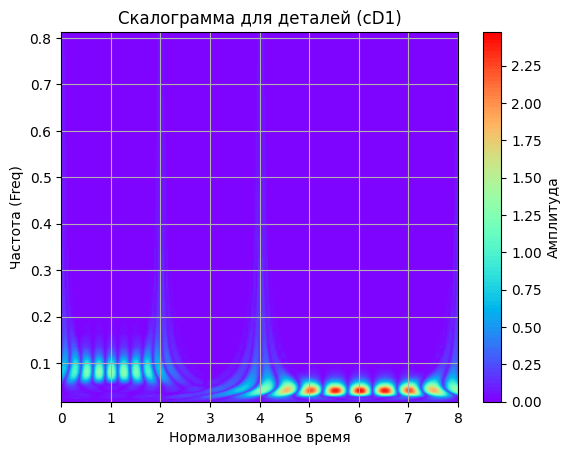

In [233]:
scales = np.arange(1, 50)
wavelet = 'morl'

# Скалограмма для cA3
coeff_A3, freqs_A3 = pywt.cwt(cA3, scales, wavelet)
plt.figure()
plt.title('Скалограмма для приближений (cA3)')
plt.xlabel('Нормализованное время')
plt.ylabel('Частота (Freq)')
plt.contourf(np.linspace(min(x)/np.pi, max(x)/np.pi, len(cA3)), freqs_A3, np.abs(coeff_A3), 100, cmap='rainbow')
plt.colorbar(label='Амплитуда')
plt.grid(True)
plt.show()

# Скалограмма для cD3
coeff_D3, freqs_D3 = pywt.cwt(cD3, scales, wavelet)
plt.figure()
plt.title('Скалограмма для деталей (cD3)')
plt.xlabel('Нормализованное время')
plt.ylabel('Частота (Freq)')
plt.contourf(np.linspace(min(x)/np.pi, max(x)/np.pi, len(cD3)), freqs_D3, np.abs(coeff_D3), 100, cmap='rainbow')
plt.colorbar(label='Амплитуда')
plt.grid(True)
plt.show()

# Скалограмма для cD2
coeff_D2, freqs_D2 = pywt.cwt(cD2, scales, wavelet)
plt.figure()
plt.title('Скалограмма для деталей (cD2)')
plt.xlabel('Нормализованное время')
plt.ylabel('Частота (Freq)')
plt.contourf(np.linspace(min(x)/np.pi, max(x)/np.pi, len(cD2)), freqs_D2, np.abs(coeff_D2), 100, cmap='rainbow')
plt.colorbar(label='Амплитуда')
plt.grid(True)
plt.show()

# Скалограмма для cD1
coeff_D1, freqs_D1 = pywt.cwt(cD1, scales, wavelet)
plt.figure()
plt.title('Скалограмма для деталей (cD1)')
plt.xlabel('Нормализованное время')
plt.ylabel('Частота (Freq)')
plt.contourf(np.linspace(min(x)/np.pi, max(x)/np.pi, len(cD1)), freqs_D1, np.abs(coeff_D1), 100, cmap='rainbow')
plt.colorbar(label='Амплитуда')
plt.grid(True)
plt.show()


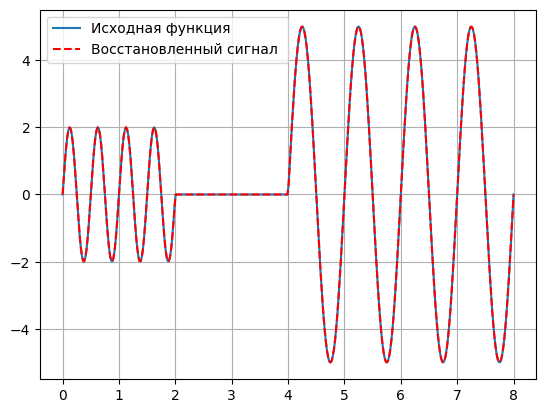

In [234]:
reconstructed_signal = pywt.waverec(coeffs, 'db1')

plt.figure()
plt.plot(x/np.pi,y , label='Исходная функция')
plt.plot(x/np.pi,reconstructed_signal, color='red', label='Восстановленный сигнал ', linestyle='--')
plt.legend()
plt.grid(True)
plt.show()

## Декодирование сигнала

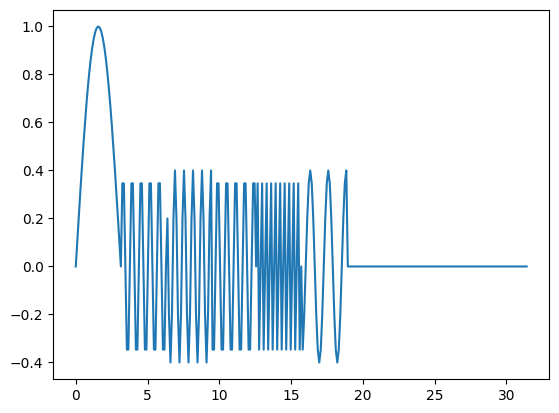

In [239]:
import pandas as pd

# data = pd.DataFrame({'x': x, 'y': y_gen})
# data.to_csv('signal.csv', index=False)


data = pd.read_csv('data.csv')
x = data['x']
y = data['y']

plt.plot(x, y, label="Cигнал")

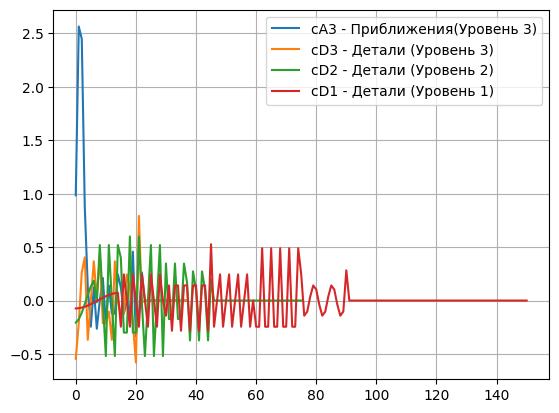

In [242]:
coeffs = pywt.wavedec(y, 'db1', level=3)
cA3, cD3, cD2, cD1 = coeffs

plt.plot(cA3, label='cA3 - Приближения(Уровень 3)')
plt.legend()
plt.plot(cD3, label='cD3 - Детали (Уровень 3)')
plt.legend()
plt.plot(cD2, label='cD2 - Детали (Уровень 2)')
plt.legend()
plt.plot(cD1, label='cD1 - Детали (Уровень 1)')
plt.legend()
plt.grid(True)


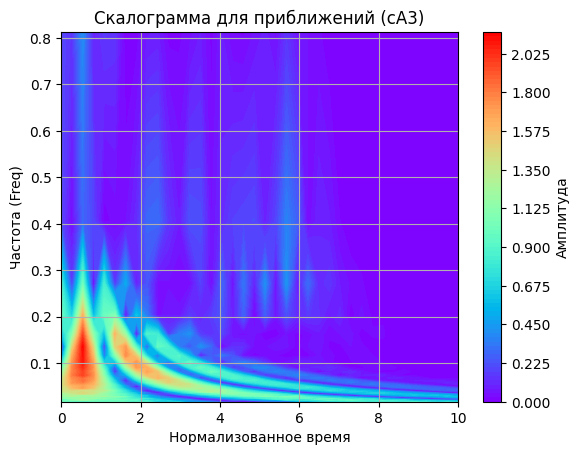

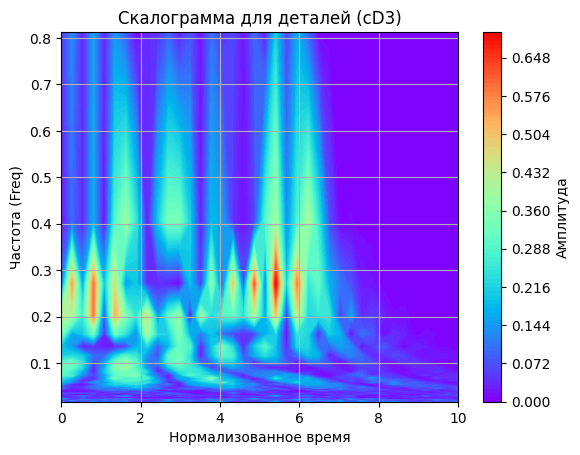

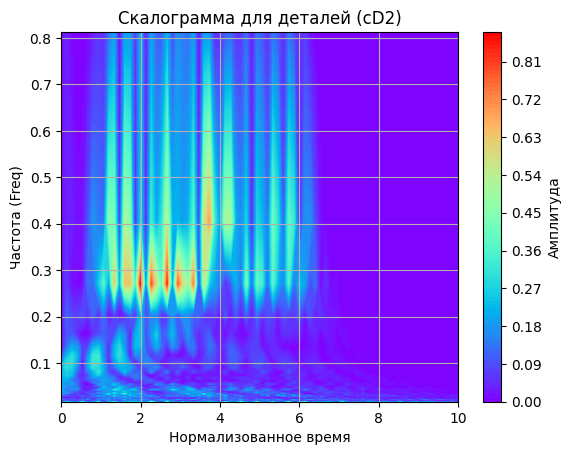

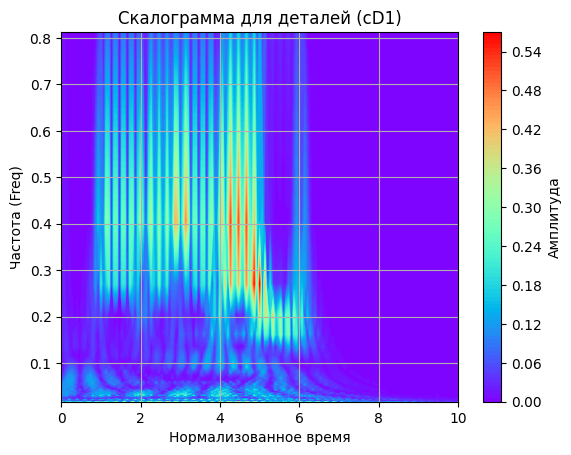

In [243]:
scales = np.arange(1, 50)
wavelet = 'morl'

# Скалограмма для cA3
coeff_A3, freqs_A3 = pywt.cwt(cA3, scales, wavelet)
plt.figure()
plt.title('Скалограмма для приближений (cA3)')
plt.xlabel('Нормализованное время')
plt.ylabel('Частота (Freq)')
plt.contourf(np.linspace(min(x)/np.pi, max(x)/np.pi, len(cA3)), freqs_A3, np.abs(coeff_A3), 100, cmap='rainbow')
plt.colorbar(label='Амплитуда')
plt.grid(True)
plt.show()

# Скалограмма для cD3
coeff_D3, freqs_D3 = pywt.cwt(cD3, scales, wavelet)
plt.figure()
plt.title('Скалограмма для деталей (cD3)')
plt.xlabel('Нормализованное время')
plt.ylabel('Частота (Freq)')
plt.contourf(np.linspace(min(x)/np.pi, max(x)/np.pi, len(cD3)), freqs_D3, np.abs(coeff_D3), 100, cmap='rainbow')
plt.colorbar(label='Амплитуда')
plt.grid(True)
plt.show()

# Скалограмма для cD2
coeff_D2, freqs_D2 = pywt.cwt(cD2, scales, wavelet)
plt.figure()
plt.title('Скалограмма для деталей (cD2)')
plt.xlabel('Нормализованное время')
plt.ylabel('Частота (Freq)')
plt.contourf(np.linspace(min(x)/np.pi, max(x)/np.pi, len(cD2)), freqs_D2, np.abs(coeff_D2), 100, cmap='rainbow')
plt.colorbar(label='Амплитуда')
plt.grid(True)
plt.show()

# Скалограмма для cD1
coeff_D1, freqs_D1 = pywt.cwt(cD1, scales, wavelet)
plt.figure()
plt.title('Скалограмма для деталей (cD1)')
plt.xlabel('Нормализованное время')
plt.ylabel('Частота (Freq)')
plt.contourf(np.linspace(min(x)/np.pi, max(x)/np.pi, len(cD1)), freqs_D1, np.abs(coeff_D1), 100, cmap='rainbow')
plt.colorbar(label='Амплитуда')
plt.grid(True)
plt.show()


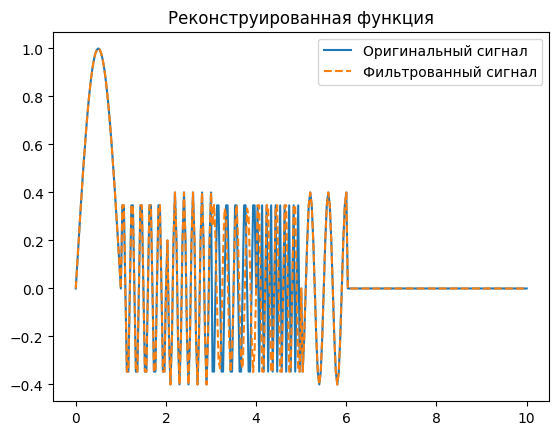

In [291]:
x = np.linspace(0, np.pi * 10, 301)
n = len(x)
y_rec = 1 * np.sin(x * 1)

y_rec[x > np.pi * 1] = 0.4 * np.sin(x[x > np.pi * 1] * 10)
y_rec[x > np.pi * 2] = 0.4 * np.cos(x[x > np.pi * 2] * 10)
y_rec[x > np.pi * 3] = 0.35 * np.sin(x[x > np.pi * 3] * 8)
y_rec[x > np.pi * 4] = 0.4 * np.sin(x[x > np.pi * 4] * 10)
y_rec[x > np.pi * 5] = 0.4 * np.cos(x[x > np.pi * 5] * 5)

y_rec[x > np.pi * 6] = 0.




plt.figure()
plt.title("Реконструированная функция")
plt.plot(x/np.pi, y, label="Оригинальный сигнал")
plt.plot(x/np.pi, y_rec.real, '--', label="Фильтрованный сигнал")
plt.legend()

plt.show()